In [1]:
__nbid__ = '0015'
__author__ = 'Knut Olsen <knut.olsen@noirlab.edu>', 'David Herrera <david.herrera@noirlab.edu>', 'Astro Data Lab Team <datalab@noirlab.edu>'
__version__ = '20251205' # yyyymmdd
__datasets__ = ['smash_dr2']
__keywords__ = ['LMC', 'Healpix map', 'plot:cmd']

# Explorando SMASH DR2

*Knut Olsen & el Equipo de Astro Data Lab*

#### (_Traducción de [ExploringSMASHDR2.ipynb](https://github.com/astro-datalab/notebooks-latest/blob/master/03_ScienceExamples/GalacticStructure/ExploringSMASHDR2.ipynb)_)

## Tabla de contenido
* [Objetivos y Resumen](#goals)
* [Avisos legales y atribuciones](#attribution)
* [Importaciones y configuración](#import)
* [Autenticación](#auth)
* [Información básica](#basic)
* [Examinar las columnas de la tabla de objetos SMASH DR2](#columns)
* [Hacer un mapa de densidad de objetos](#density)
* [Hacer mapas de profundidad y color](#depth)
* [Hacer una consulta espacial y diagramas color-color y CMD](#cmd)
* [Servicio de Archivos SMASH DR2](#fileservice)
* [Recursos y referencias](#resources)

<a class="anchor" id="goals"></a>
# Objetivos
* Obtener una visión general del contenido de SMASH DR2
* Aprender a hacer mapas de densidad de objetos, profundidad y color
* Aprender a graficar diagramas color-magnitud de SMASH DR2
* Aprender a usar la tabla cruzada para limpiar un DCM usando movimientos propios de Gaia

# Resumen
El _Survey of the Magellanic Stellar History_ (SMASH)(o Survey de la Historia Estelar de Magallanes) utilizó la Dark Energy Camera (DECam) para mapear 480 grados cuadrados del cielo hasta profundidades de ugriz~24 mag con el objetivo de identificar poblaciones estelares de bajo brillo superficial ampliamente distribuidas asociadas con los halos estelares y restos de marea de las Nubes de Magallanes. Contiene mediciones de aproximadamente 360 millones de objetos distribuidos en campos discretos que abarcan un área de alrededor de 2400 grados cuadrados. La primera publicación de datos (DR1) contenía ~100 millones de objetos de 61 campos observados, mientras que la segunda publicación (Nidever et al. 2020) contiene los 360 millones de objetos en 197 campos. El artículo general sobre SMASH (Nidever et al. 2017) describe el survey en detalle, incluyendo sus objetivos, estrategia, reducción y calibración.

El Data Lab aloja varias tablas en el esquema smash_dr2: 
* field - Información de cada campo (197 filas).
* exposure - Información de cada exposición (5,982 filas).
* chip - Información de cada chip de imagen (359,393 filas).
* source - Todas las mediciones individuales de fuentes (4,155,114,664 filas).
* object - Valores promedio para cada objeto único (360,201,921 filas).
* deep - Igual que object pero usando solo las exposiciones más profundas de cada campo (357,395,383 filas).
* xmatch - Cruces entre SMASH y Gaia DR2, 2MASS y ALLWISE (4,155,114,664 filas).

En este notebook, usaremos algunas de estas tablas para explorar el survey SMASH.

<a class="anchor" id="attribution"></a>
# Avisos Legales y atribuciones

Avisos Legales
-----------
Tome en cuenta que usar el Astro Data Lab constituye un acuerdo con nuestros [Avisos Legales](https://datalab.noirlab.edu/disclaimers.php) mínimos.

Reconocimientos
---------------
Si ud. usa el **Astro Data Lab** en sus publicaciones de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios de datos proveeidos por el Astro Data Lab, el cual es parte del Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) del NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc."(Asociación de Universidaddes para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

Si utiliza **SPARCL junto con la plataforma de Astro Data Lab** (por medio de JupyterLab, línea de comando o interfaz de la web) en su publicación de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios o datos proporcionados por el "SPectra Analysis and Retrievable Catalog Lab" (SPARCL) (Laboratorio de Análisis y Catálogo Recuperable de Espectros) y el Astro Data Lab, ambos pertenecientes al Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) de NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc." (Asociación de Universidades para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

En cualquiera de los casos, **por favor cite las siguientes publicaciones**:

* Publicación del concepto de Data Lab: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Descripción general del Astro Data Lab: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411.

Si hace referencia al Jupyterlab / Jupyter notebooks de Data Lab, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097.

Si publica en una revista de la AAS, agregue también la palabra clave `\facility{Astro Data Lab}`

Y si está usando SPARCL, por vor agregue también `\software{SPARCL}` y cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576.

La biblioteca de NOIRLab mantiene [listas de reconocimientos apropiados](https://noirlab.edu/science/about/scientific-acknowledgments) para usar cuando se hacen publicaciones utilizando los recursos, servicios o datos del Laboratorio.

---- **Versión en Inglés** ----

# Disclaimer & attribution

Disclaimers
-----------
Note that using the Astro Data Lab constitutes your agreement with our minimal [Disclaimers](https://datalab.noirlab.edu/disclaimers.php).

Acknowledgments
---------------
If you use **Astro Data Lab** in your published research, please include the text in your paper's Acknowledgments section:

_This research uses services or data provided by the Astro Data Lab, which is part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

If you use **SPARCL jointly with the Astro Data Lab platform** (via JupyterLab, command-line, or web interface) in your published research, please include this text below in your paper's Acknowledgments section:

_This research uses services or data provided by the SPectra Analysis and Retrievable Catalog Lab (SPARCL) and the Astro Data Lab, which are both part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

In either case **please cite the following papers**:

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Astro Data Lab overview: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411

If you are referring to the Data Lab JupyterLab / Jupyter Notebooks, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097

If publishing in a AAS journal, also add the keyword: `\facility{Astro Data Lab}`

And if you are using SPARCL, please also add `\software{SPARCL}` and cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576

The NOIRLab Library maintains [lists of proper acknowledgments](https://noirlab.edu/science/about/scientific-acknowledgments) to use when publishing papers using the Lab's facilities, data, or services.

For this notebook specifically, please acknowledge:

* SMASH overview paper: Nidever et al. 2017, "SMASH – Survey of the Magellanic Stellar History", AJ, 2017, 154, 199, https://ui.adsabs.harvard.edu/abs/2017AJ....154..199N/

* SMASH DR2 paper: Nidever et al. 2021, "The Second Data Release of SMASH – Survey of the Magellanic Stellar History", AJ, 2021, 161, 74, https://ui.adsabs.harvard.edu/abs/2021AJ....161...74N

<a class="anchor" id="import"></a>
# Importaciones y configuración

In [1]:
import numpy as np
import pylab as plt
import matplotlib
import healpy as hp
import pandas as pd
from io import StringIO
from astropy import units as u
from getpass import getpass

%matplotlib inline

# Importaciones de Data Lab y relacionadas
from dl import authClient as ac, queryClient as qc
from dl import storeClient as sc

<a class="anchor" id="auth"></a>
# Autenticación
Se puede acceder a gran parte de la funcionalidad de Data Lab sin iniciar sesión explícitamente (el servicio utiliza un inicio de sesión anónimo). Sin embargo, algunas funciones, como guardar los resultados de las consultas en el espacio de almacenamiento virtual, requieren iniciar sesión (es decir, necesitará una cuenta de usuario registrada).

Si necesita iniciar sesión en Data Lab, descomente la celda a continuación y ejecútela:

In [ ]:
#token = ac.login(input("Ingrese su nombre de usuario: (+ENTER) "),getpass("Ingrese su contraseña:: (+ENTER) "))
#ac.whoAmI()

<a class="anchor" id="basic"></a>
# Información básica
Primero, veamos las tablas disponibles en la base de datos SMASH DR2 y luego obtengamos información básica desde la base de datos de estadísticas de Data Lab (<tt>tbl_stat</tt>) sobre la tabla principal de objetos SMASH, smash_dr2.object.  

In [2]:
try:
    print(qc.schema('smash_dr2',profile='default'))
except Exception as e:
    print(e.message)


Schema: smash_dr2

      Table Name   Description
      ----------   -----------
            chip   Info on each chip in the frame (359,393 rows)
            deep   Average photometry of each unique object only from deep ex
                   posures (357,535,065 rows)
        exposure   Info on each exposure (5,982 rows)
           field   Info on each target field (position, Num exposures, etc) (
                   197 rows)
          object   Average photometry of each unique object (360,363,299 rows)
          source   All of the individual source measurements (4,156,198,451 rows)
x1p5__object__allwise__source   smash_dr2.object and allwise.source crossmatch (1.5 arcsec)
x1p5__object__gaia_dr3__gaia_source   xmatch_std.smash_dr2__object and gaia_dr3.gaia_source cros
                   smatch (1.5 arcsec)
x1p5__object__nsc_dr2__object   smash_dr2.object and nsc_dr2.object crossmatch (1.5 arcsec)
x1p5__object__unwise_dr1__object   smash_dr2.object and unwise_dr1.object crossmatch (1

In [3]:
query = "SELECT * FROM tbl_stat WHERE schema='smash_dr2' AND tbl_name='object'" # Recuperar estadísticas útiles rápidamente
try:
    info = qc.query(sql=query) # por omisión, el resultado es un string CSV formateado
except Exception as e:
    print(e.message)

In [4]:
print(info.split('\n')[0]) # fila de encabezado
print(info.split('\n')[-2]) #(penúltima línea, la última línea está vacía)

schema,tbl_name,nrows,ncols,nindex,table_size,indexes_size,total_size
smash_dr2,object,360363296,42,26,74 GB,140 GB,214 GB


<a class="anchor" id="fields"></a>
# Graficar campos
Ahora, consultaremos la tabla smash_dr2.fields y haremos un gráfico de los campos en el cielo.

In [5]:
# Consulta DB para obtener una lista de todos los campos SMASH
query = "SELECT * FROM smash_dr2.field"  # definir la consulta SQL como string
df_field = qc.query(sql=query,fmt='pandas')  # enviar la consulta, devolver como dataframe de Pandas

In [6]:
df_field

,ra,dec,glon,glat,mlon,mlat,elon,elat,fieldid,ring256,...,nexp_i,nexp_z,ucalib,gcalib,rcalib,icalib,zcalib,htm9,nest4096,name
0,172.1420,-28.1462,281.530644,31.258570,63.508955,-6.461679,185.040287,-28.734387,100,578538,...,6,6,360,360,420,360,360,2528551,101375905,Field100
1,172.5690,-22.8770,279.580108,36.287276,68.689536,-5.296765,182.839333,-23.833093,101,545771,...,6,6,360,360,420,360,360,2545978,103057455,Field101
2,175.7920,-39.3373,288.795369,21.653064,53.347265,-12.289558,194.541283,-37.167871,104,642036,...,6,6,360,360,420,360,360,2526981,156716081,Field104
3,177.4930,-80.6178,300.327681,-18.058317,10.898055,-18.060186,247.119279,-65.236590,106,781228,...,6,6,360,360,420,360,360,2426006,151323513,Field106
4,179.0770,-36.2630,290.665444,25.292117,57.004874,-14.162307,195.485806,-33.219666,109,625661,...,6,6,360,360,420,360,360,2524997,100812624,Field109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,164.8560,-23.1833,272.006815,32.876216,66.141194,1.335595,175.891357,-27.175343,93,547797,...,9,9,540,600,660,540,540,2540786,102951739,Field93
193,166.0920,-36.1762,279.871948,21.855463,54.260951,-4.049729,184.145022,-38.224207,94,624600,...,9,9,540,840,480,540,540,2556966,157170955,Field94
194,170.2990,-32.1685,281.569265,26.932493,59.170913,-6.110605,185.538849,-33.039414,98,602084,...,6,6,360,360,420,360,360,2538660,157251110,Field98
195,171.0490,-39.8055,285.243563,20.050837,51.960132,-8.865542,190.816367,-39.412724,99,645094,...,6,6,360,360,360,360,360,2557444,156691905,Field99


Graficaremos los campos en una proyección ortográfica del cielo austral, usando el tamaño del marcador para indicar el número de exposiciones por campo y el color para indicar el número de objetos dentro de un campo.

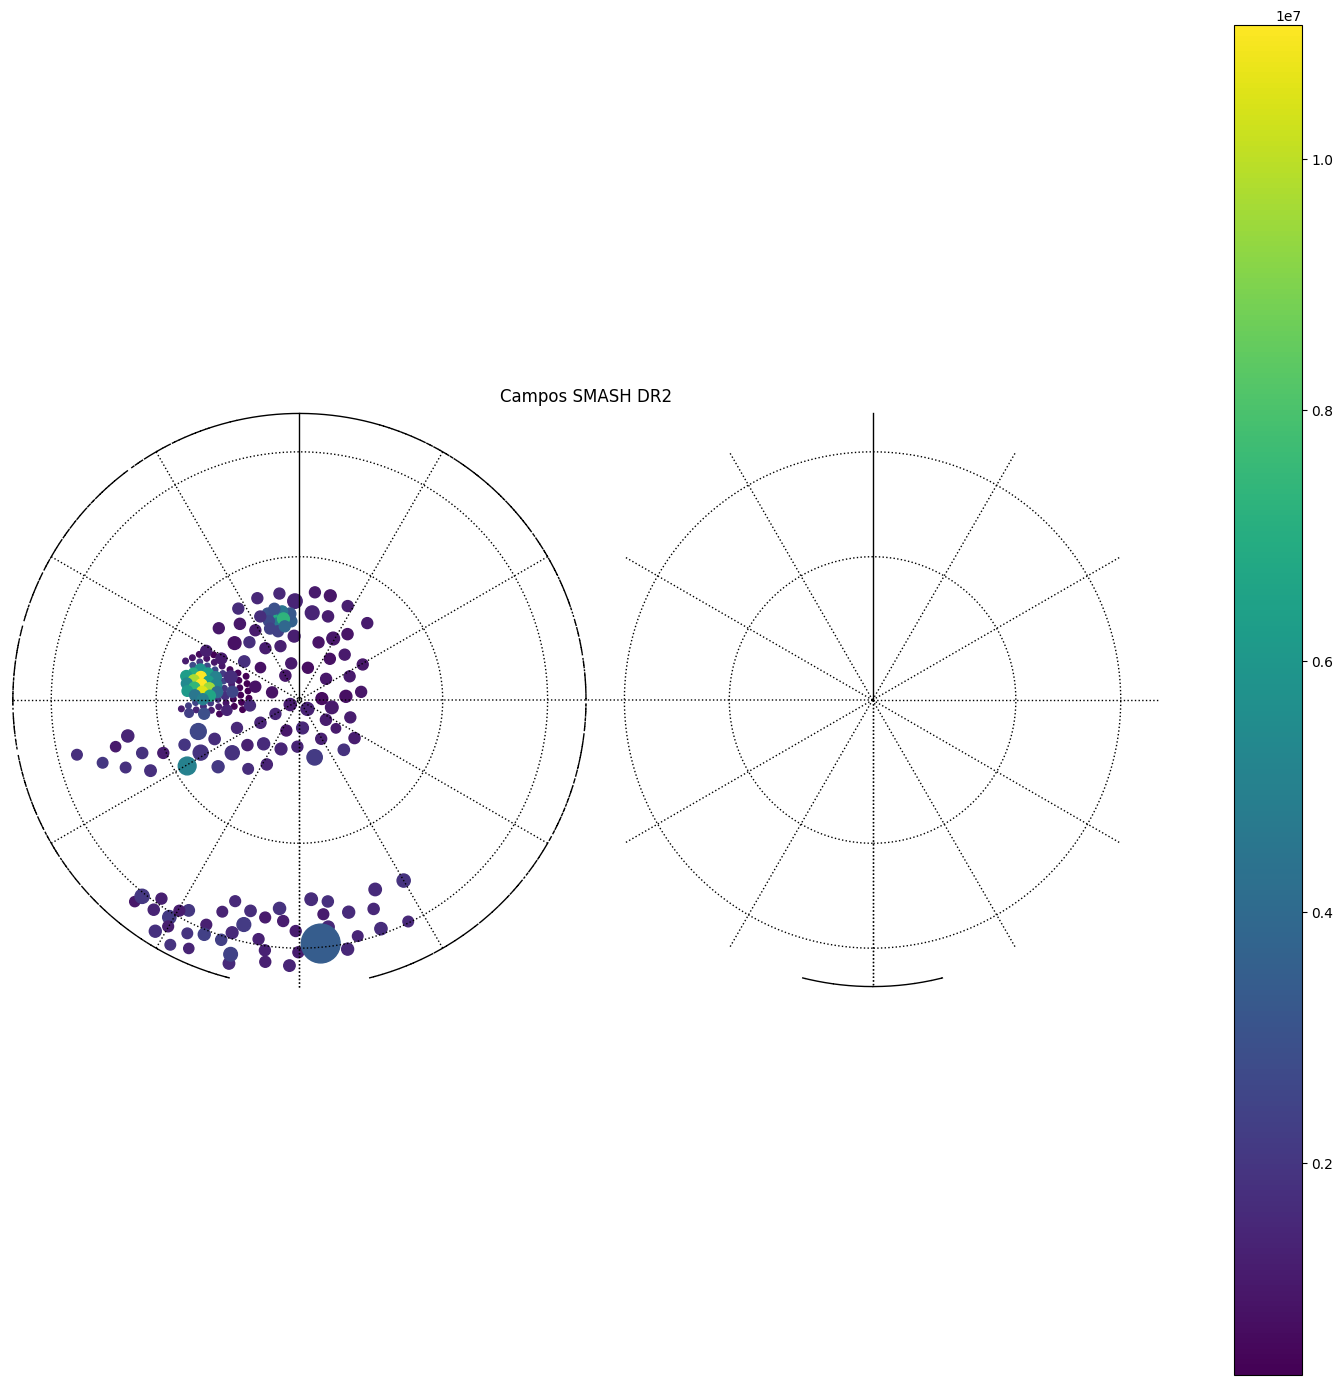

In [7]:
fig = plt.figure(figsize=(15,15))
dummy = np.zeros(hp.nside2npix(2))
hp.orthview(dummy,coord='C',rot=(0,-90,0),half_sky=False,cmap='binary',min=0,max=100,cbar=False,fig=1,title='Campos SMASH DR2',notext=True)
im = hp.projscatter(df_field['ra'],df_field['dec'],marker='o',s=df_field['nexp'].values*2,c=df_field['nobj'],lonlat=True,cmap='viridis')
hp.graticule()
plt.colorbar(im)

labels = False # cambiar a True si se desea etiquetar los puntos con los IDs de los campos
if labels:
    for ra1,dec1,fid1 in zip(df_field['ra'].values,df_field['dec'].values,df_field['fieldid'].values):
        hp.projtext(ra1, dec1,fid1,coord='C',lonlat=True)

El número de objetos en un campo dado es función tanto del brillo superficial como de la profundidad fotométrica. Los campos del cuerpo principal están muy poblados, y por ello tienen muchos objetos. El campo 169 tiene muchos objetos porque se tomaron muchas exposiciones en él.

<a class="anchor" id="columns"></a>
# Examinar las columnas de la tabla de objetos SMASH DR2
A continuación, veremos las primeras 100 filas de smash_dr2.object y obtendremos todas las columnas. A lo largo de este notebook, almacenaremos resultados como dataframes de Pandas.

In [8]:
query = """SELECT *
           FROM smash_dr2.object
           LIMIT 100
        """

In [9]:
try:
    df1 = qc.query(sql=query, fmt='pandas') # por omisión el resultado es un string CSV formateado
except Exception as e:
    print(e.message)

In [10]:
print("Número de filas:", len(df1))
print(df1.columns) # imprimir encabezados de columnas
print(len(df1.columns))

Número de filas: 100
Index(['ra', 'dec', 'glon', 'glat', 'elon', 'elat', 'raerr', 'decerr',
       'rascatter', 'decscatter', 'umag', 'uerr', 'uscatter', 'gmag', 'gerr',
       'gscatter', 'rmag', 'rerr', 'rscatter', 'imag', 'ierr', 'iscatter',
       'zmag', 'zerr', 'zscatter', 'chi', 'sharp', 'prob', 'ebv', 'htm9',
       'ring256', 'nest4096', 'random_id', 'ndet', 'depthflag', 'ndetu',
       'ndetg', 'ndetr', 'ndeti', 'ndetz', 'flag', 'id'],
      dtype='object')
42


In [11]:
df1

,ra,dec,glon,glat,elon,elat,raerr,decerr,rascatter,decscatter,...,random_id,ndet,depthflag,ndetu,ndetg,ndetr,ndeti,ndetz,flag,id
0,103.068355,-37.973539,247.782969,-16.141355,111.190624,-60.455055,0.099110,0.099110,99.990000,99.990000,...,15.648018,1,1,0,1,0,0,0,-1,Field153.1633022
1,103.071774,-37.973599,247.784083,-16.138880,111.196021,-60.454623,0.073320,0.073320,99.990000,99.990000,...,96.674060,1,1,0,1,0,0,0,-1,Field153.1633023
2,103.071598,-37.972329,247.782804,-16.138531,111.195274,-60.453399,0.060229,0.060229,99.990000,99.990000,...,94.100784,1,1,0,1,0,0,0,-1,Field153.1632994
3,103.082522,-37.972303,247.786153,-16.130543,111.212433,-60.451802,0.401499,0.401499,99.990000,99.990000,...,96.538780,1,1,1,0,0,0,0,-1,Field153.1751465
4,103.083560,-37.972606,247.786766,-16.129898,111.214178,-60.451950,0.236335,0.236335,99.990000,99.990000,...,27.446424,1,1,1,0,0,0,0,-1,Field153.1751475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,103.107393,-37.970545,247.792141,-16.111717,111.250866,-60.446490,0.341630,0.341630,99.990000,99.990000,...,64.810450,1,1,1,0,0,0,0,-1,Field153.1751401
96,103.109272,-37.971138,247.793294,-16.110568,111.254039,-60.446802,0.039559,0.039559,0.012873,0.040775,...,73.334270,2,1,1,1,0,0,0,-1,Field153.1632970
97,103.116218,-37.973574,247.797789,-16.106414,111.265857,-60.448195,0.274660,0.274660,99.990000,99.990000,...,48.086227,1,1,1,0,0,0,0,-1,Field153.1751492
98,103.120233,-37.971245,247.796785,-16.102604,111.271301,-60.445326,0.245550,0.245550,99.990000,99.990000,...,33.467125,1,1,0,1,0,0,0,-1,Field153.1632971


Usaremos la información en estas columnas en las secciones siguientes.

<a class="anchor" id="density"></a>
# Hacer un mapa de densidad de objetos
Dos de las columnas de la tabla de objetos SMASH DR2, ring256 y nest4096, contienen los índices Healpix (NSIDE=256 y 4096, esquemas ring y nested) para el RA y Dec de los objetos. Healpix es una teselación útil del cielo en mosaicos de igual área. El módulo Python healpy tiene todas las funciones relacionadas con Healpix.

Para hacer mapas de cantidades agregadas en SMASH, usaremos la base de datos para devolver resultados en una consulta agrupada por el valor del índice Healpix. Luego podemos poner los resultados en arrays y usar la funcionalidad de healpy para mostrar los mapas.

Una forma de agregar datos es simplemente contar el número de filas sujetas a una restricción, en este caso para objetos con errores fotométricos en la banda r menores a 0.2 mag:

In [12]:
print(qc.query(sql='SELECT COUNT(ra) FROM smash_dr2.object WHERE rerr<0.2'))

count
193407739



Usando GROUP BY, podemos agregar en bins especificados. En la siguiente consulta, la cláusula GROUP BY indica a la base de datos que agregue los resultados por los valores en la columna nest4096 y devuelva el promedio de RA y Dec de los objetos en esos grupos, así como el valor de nest4096 y la cantidad de objetos en el grupo.

In [13]:
query = """SELECT avg(ra) as ra0,avg(dec) as dec0,nest4096,count(nest4096) as nb
           FROM smash_dr2.object
           WHERE rerr<0.2
           GROUP BY nest4096
        """

In [14]:
try:
    df_density = qc.query(sql=query,fmt='pandas') # Por omisión el resultado es un string CSV formateado
except Exception as e:
    print(e.message)

Verifiquemos que el número total de objetos devueltos sea el mismo que en la consulta COUNT anterior:

In [15]:
print(np.sum(df_density['nb'])) # imprimir totales

193407739


### Crear el mapa Healpix
Un mapa Healpix es simplemente un array unidimensional con número de elementos definido por el parámetro NSIDE, que indica cuántas veces se dividen los Healpixels base. Podemos visualizarlo como un mapa usando la librería <tt>healpy</tt>.

In [16]:
hmap = np.zeros(hp.nside2npix(4096))

In [17]:
print(df_density.head())

          ra0       dec0   nest4096  nb
0  178.636895 -37.315032  100712303   2
1  178.675798 -37.316326  100712307   1
2  178.661385 -37.314686  100712312   2
3  178.669353 -37.311539  100712313   9
4  178.650171 -37.308400  100712314  10


### Poblar el mapa Healpix
Ahora asignamos a los elementos de nuestro mapa Healpix el número de objetos devueltos por la consulta, calculamos el centro de la distribución de RA y Dec de los objetos y usamos orthview de healpy para visualizar la salida. Usaremos una versión logarítmica del mapa para la visualización. También sobrepondremos la ubicación del plano Galáctico. Healpy permite mezclar coordenadas ecuatoriales (coord='C') y galácticas (coord='G').

In [18]:
hmap[df_density['nest4096']]=df_density['nb']

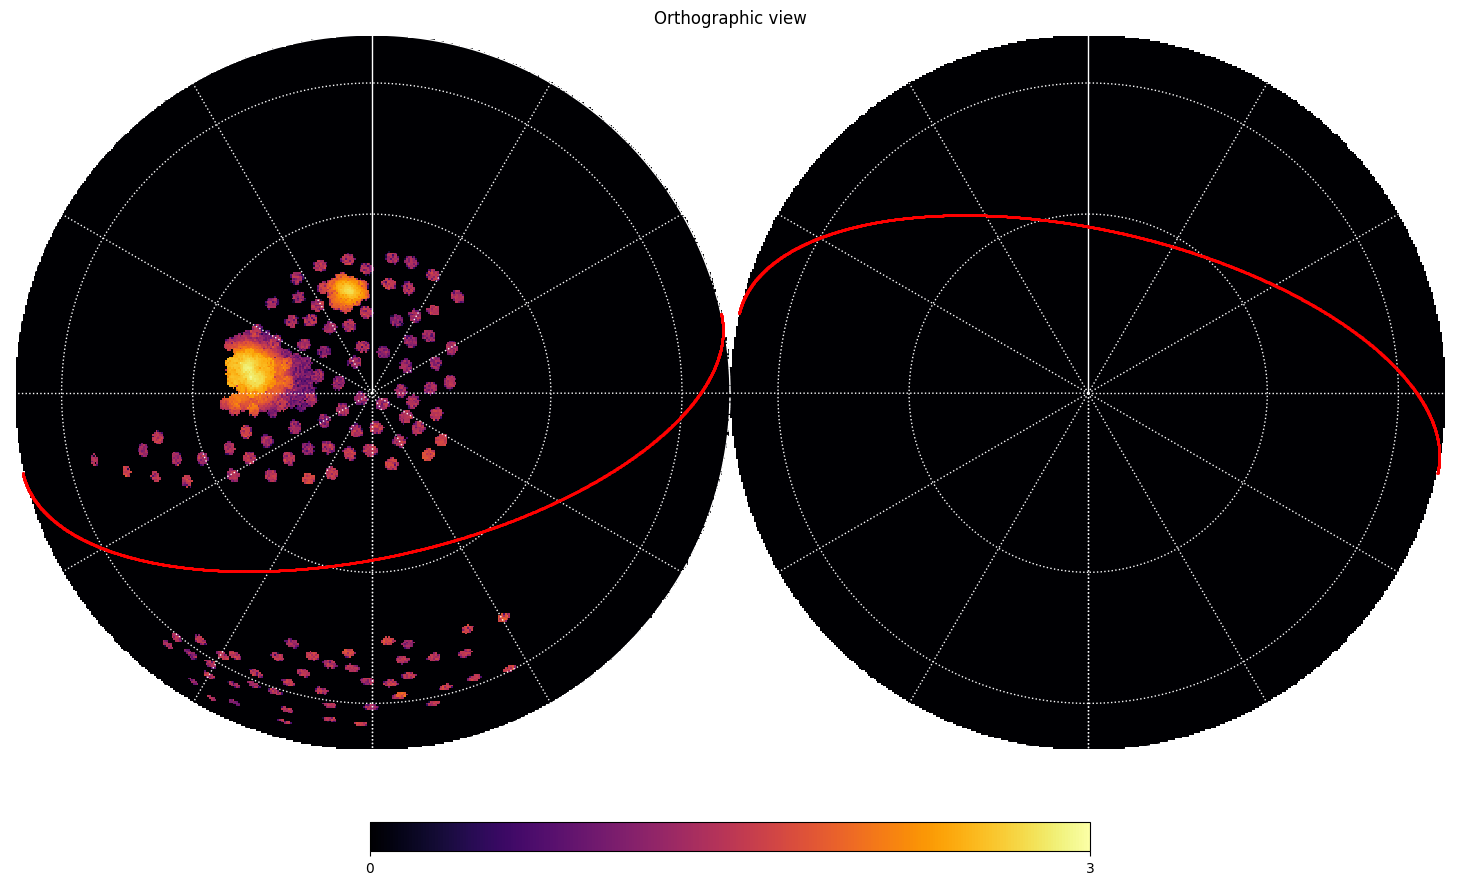

In [19]:
fig = plt.figure(figsize=(15,15))
lon=np.arange(3600)/10
lat=np.zeros(3600)
hp.orthview(np.log10(hmap+1),nest=True,fig=1,rot=(0,-90,0),min=0,max=3,cmap='inferno',coord='C',half_sky=False,norm='linear',notext=True)
hp.graticule(c='w')
foo=hp.projplot(lon,lat,'ro',coord='G',lonlat=True,markersize=1)

In [20]:
print(hp.nside2resol(4096,arcmin=True))

0.8588716029543515


El mapa Healpix, con NSIDE=4096, tiene una resolución de 0.86 arcmin por píxel, dando varios elementos de resolución por cada CCD de DECam. Podemos ver esta resolución si hacemos zoom en uno de los campos. El campo 169 contiene la galaxia enana Hydra II, descubierta por Martin et al. (2015). Puedes ver a Hydra II como una sobredensidad cerca del centro del contorno más prominente del campo DECam.

In [21]:
f169 = df_field[df_field['fieldid']==169]

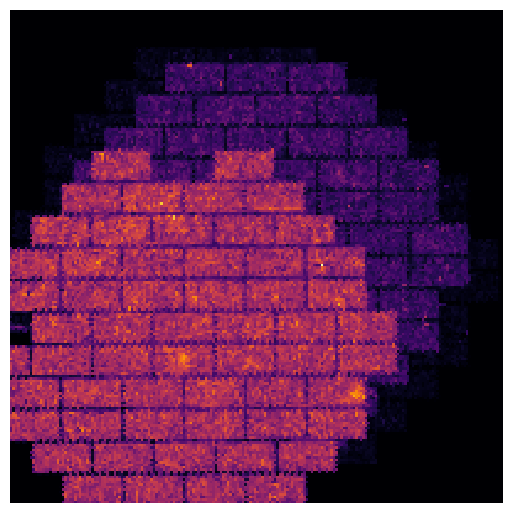

In [22]:
hp.gnomview(hmap,title='',notext=True,cbar=False,reso=0.75,nest=True,rot=(f169['ra'].array[0],f169['dec'].array[0],0),cmap='inferno',min=0,max=200)

<a class="anchor" id="depth"></a>
# Hacer mapas de profundidad y color
Ahora haremos nuestros mapas un poco más sofisticados. Haremos que la base de datos devuelva las magnitudes promedio en bandas g e i y los colores, y aplicaremos algunos cortes sobre los errores de magnitud. Nuevamente usamos GROUP BY sobre la columna nest4096.

In [23]:
query = """SELECT avg(ra) as ra0,avg(dec) as dec0,nest4096,count(nest4096) as nb,
            avg(gmag) as g,avg(imag) as i,
            avg(gmag-imag) as g_i
           FROM smash_dr2.object
           WHERE gerr<0.2 AND ierr<0.2
           GROUP BY nest4096
          """
print(query)

SELECT avg(ra) as ra0,avg(dec) as dec0,nest4096,count(nest4096) as nb,
            avg(gmag) as g,avg(imag) as i,
            avg(gmag-imag) as g_i
           FROM smash_dr2.object
           WHERE gerr<0.2 AND ierr<0.2
           GROUP BY nest4096
          


In [24]:
try:
    df_map = qc.query(sql=query,fmt='pandas') # Por omisión el resultado es un string CSV formateado
except Exception as e:
    print(e.message)

In [25]:
print(df_map.head())

          ra0       dec0   nest4096  nb          g          i       g_i
0  178.632900 -37.315792  100712303   1  23.217781  21.083721  2.134060
1  178.661385 -37.314686  100712312   2  22.351546  21.175097  1.176450
2  178.669545 -37.311967  100712313   7  20.519009  19.167672  1.351337
3  178.647937 -37.309070  100712314   4  20.594522  18.560374  2.034148
4  178.656218 -37.293570  100712315   2  22.286801  19.531883  2.754918


### Mapa Healpix de la magnitud g promedio
El mapa de la magnitud promedio en banda g da una buena idea de cómo varía la profundidad del catálogo SMASH DR2 con la posición en el cielo. La profundidad es mucho menor en los cuerpos principales de las MC, que están muy poblados. Los campos con menor tiempo de exposición tienen menos objetos.

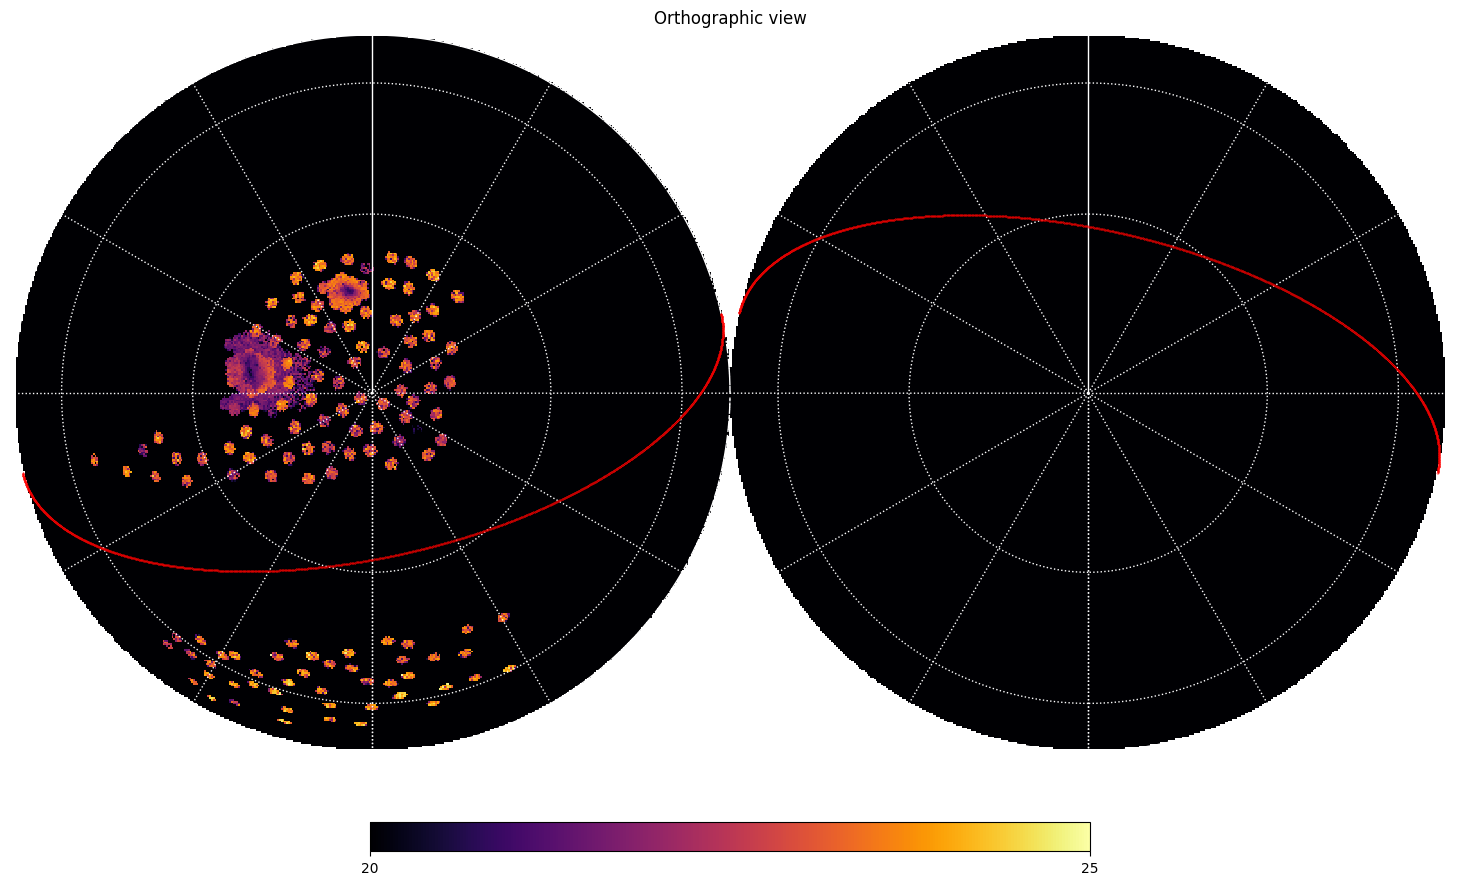

In [26]:
gmap = np.zeros(hp.nside2npix(4096))
gmap[df_map['nest4096']] = df_map['g']

fig = plt.figure(figsize=(15,15))
hp.orthview(gmap,nest=True,fig=1,rot=(0,-90,0),min=20,max=25,cmap='inferno',coord='C',half_sky=False,notext=True)
hp.graticule(c='w')
foo=hp.projplot(lon,lat,'r.',lonlat=True,coord='G',markersize=0.5)

Haremos zoom en un área cerca de la SMC y 47 Tuc para ver el mapa con mayor resolución. Las regiones muy pobladas tienen menor profundidad fotométrica, al igual que las áreas cubiertas solo por exposiciones cortas.

In [27]:
f4 = df_field[df_field['fieldid']==4]

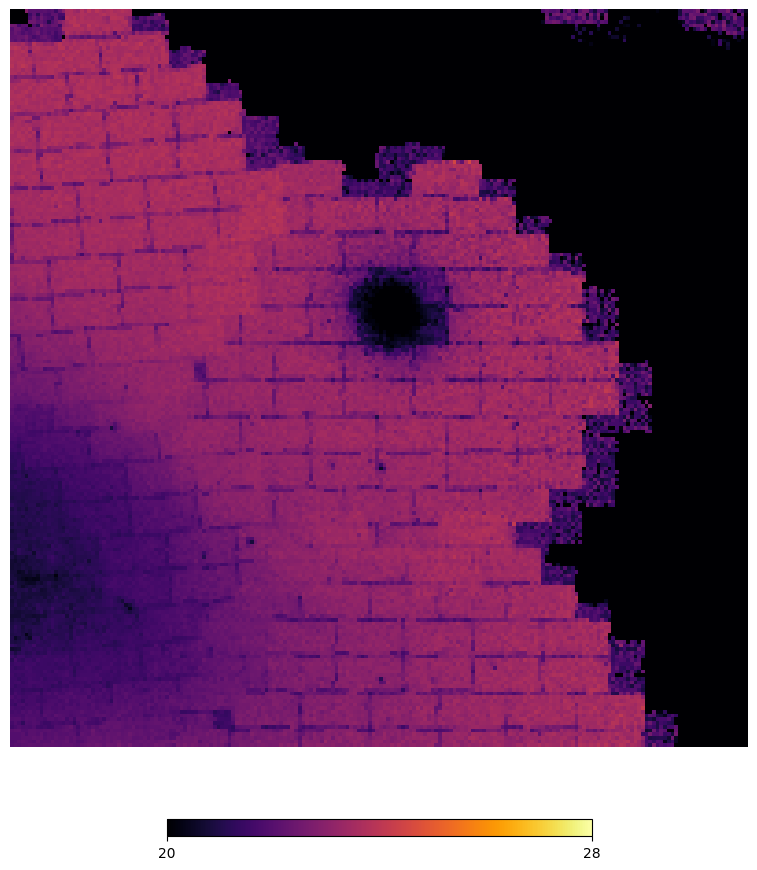

In [28]:
fig = plt.figure(figsize=(10,10))
hp.gnomview(gmap,title='',notext=True,cbar=True,reso=1,nest=True,rot=(f4['ra'].array[0],f4['dec'].array[0],0),
            cmap='inferno',min=20,max=28,fig=1)

### Mapa Healpix del color g-i promedio
El mapa del color promedio revela tanto diferencias poblacionales como los carriles de polvo en las Nubes, así como una tendencia de mayor enrojecimiento hacia el plano galáctico.

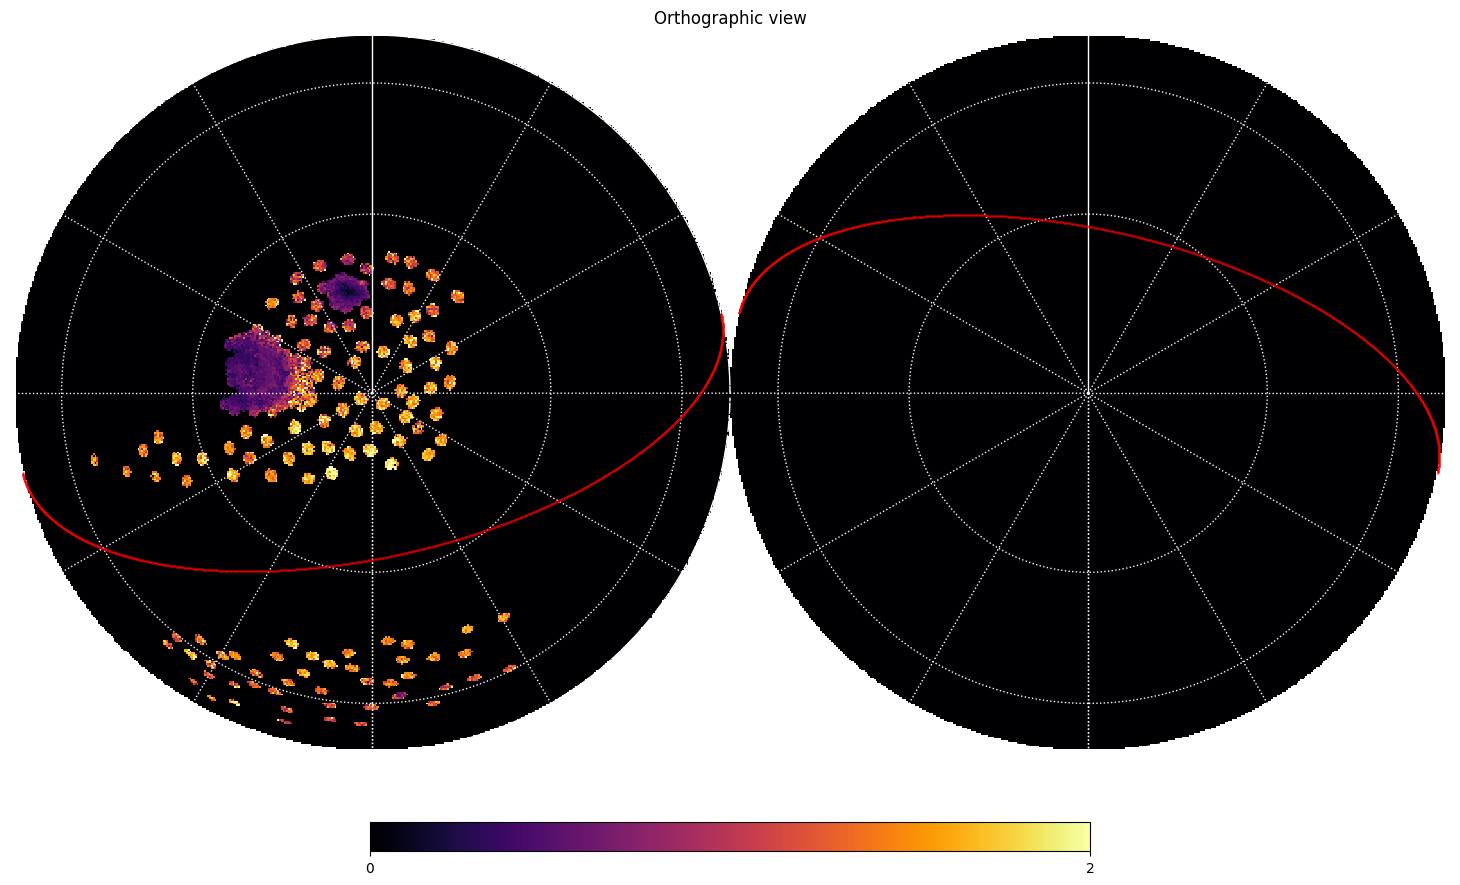

In [29]:
gimap = np.zeros(hp.nside2npix(4096))
gimap[df_map['nest4096']] = df_map['g_i']

fig = plt.figure(figsize=(15,15))
hp.orthview(gimap,nest=True,fig=1,rot=(0,-90,0),min=0,max=2,cmap='inferno',coord='C',half_sky=False,notext=True)
hp.graticule(c='w')
foo=hp.projplot(lon,lat,'r.',lonlat=True,coord='G',markersize=0.5)

Haciendo zoom en la región que contiene la SMC y 47 Tuc se muestra cómo la población de la SMC es más azul que la de 47 Tuc, y que hay carriles de polvo prominentes en la SMC.

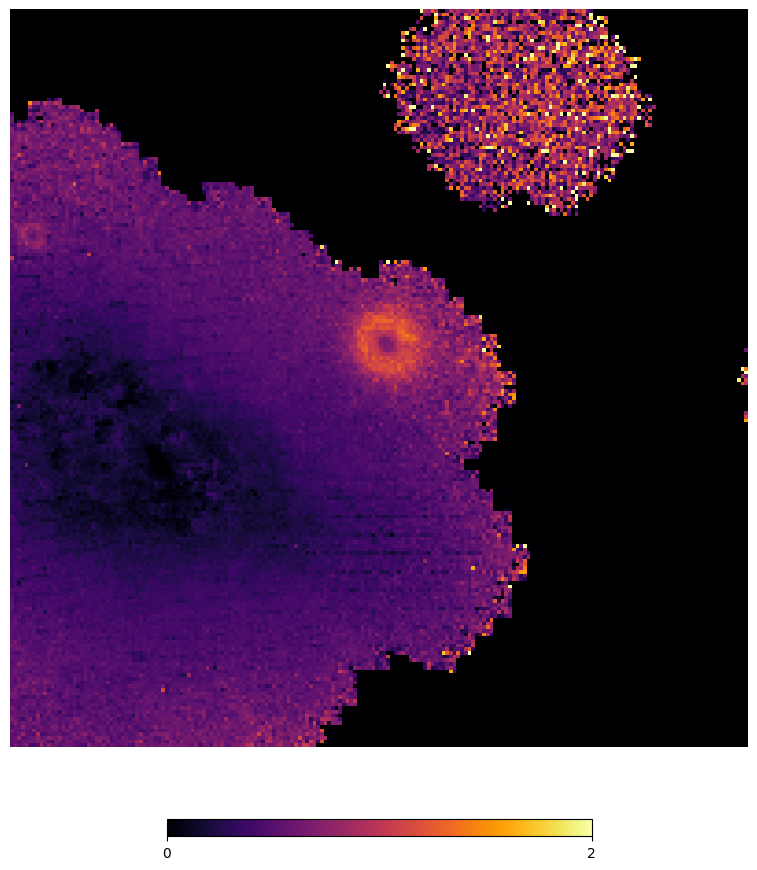

In [30]:
fig = plt.figure(figsize=(10,10))
hp.gnomview(gimap,title='',notext=True,cbar=True,reso=2,nest=True,rot=(f4['ra'].array[0],f4['dec'].array[0],0),
            cmap='inferno',min=0,max=2,fig=1)

<a class="anchor" id="cmd"></a>
# Realizar una consulta espacial y crear diagramas color-color y DCM
Ahora hagamos una búsqueda cónica de objetos dentro de un radio alrededor de una posición particular. Las tablas SMASH están indexadas espacialmente para hacer estas consultas rápidas. Buscaremos dentro de un radio de 1 grado del Campo 4 que cubre 47 Tuc y parte de la SMC.

In [31]:
query = """SELECT *
           FROM smash_dr2.object 
           WHERE q3c_radial_query(ra,dec,{0},{1},{2})
           AND gerr<0.2 AND ierr<0.2 AND rerr<0.2
        """.format(f4['ra'].iloc[0],f4['dec'].iloc[0],1.)
print(query)

SELECT *
           FROM smash_dr2.object 
           WHERE q3c_radial_query(ra,dec,6.23604,-72.3856,1.0)
           AND gerr<0.2 AND ierr<0.2 AND rerr<0.2
        


In [32]:
try:
    df_cmd = qc.query(sql=query,fmt='pandas')
except Exception as e:
    print(e.message)

In [33]:
df_cmd

,ra,dec,glon,glat,elon,elat,raerr,decerr,rascatter,decscatter,...,random_id,ndet,depthflag,ndetu,ndetg,ndetr,ndeti,ndetz,flag,id
0,5.925116,-73.381282,305.664885,-43.599478,308.779393,-62.986791,0.007111,0.007111,0.009197,0.018413,...,39.437542,22,3,3,5,6,5,3,2,48049.302936
1,5.934808,-73.381186,305.661119,-43.599984,308.782574,-62.989159,0.089011,0.089011,0.002718,0.009336,...,21.448526,14,2,2,3,3,3,3,2,48049.298951
2,5.945385,-73.381760,305.656870,-43.599865,308.784744,-62.992076,0.024885,0.024885,0.002894,0.009077,...,1.094896,15,2,3,3,3,3,3,0,48049.282788
3,5.950396,-73.381579,305.654950,-43.600255,308.786640,-62.993236,0.019274,0.019274,0.002996,0.009104,...,45.793713,15,2,3,3,3,3,3,0,48049.293919
4,5.948900,-73.381081,305.655636,-43.600684,308.787132,-62.992619,0.104071,0.104071,0.034301,0.010045,...,45.796430,15,3,2,4,3,3,3,2,48049.302787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1922784,8.116262,-71.572245,305.068294,-45.477225,312.928183,-62.646510,0.023371,0.023371,0.101752,0.073410,...,18.775333,18,3,3,4,4,4,3,2,47854.310690
1922785,8.112057,-71.571529,305.070287,-45.477797,312.928027,-62.645002,0.099718,0.099718,0.018596,0.019881,...,0.571520,25,2,2,6,6,6,5,0,47854.193710
1922786,8.089613,-71.568166,305.080855,-45.480394,312.926340,-62.637188,0.031197,0.031197,0.036864,0.030148,...,26.746720,19,3,3,3,6,4,3,2,47854.300541
1922787,8.089704,-71.567329,305.080940,-45.481230,312.927932,-62.636781,0.007237,0.007237,0.026941,0.029180,...,45.699493,27,3,3,6,7,6,5,2,47854.276042


### Hacer diagramas color-color y DCM
Mostraremos el diagrama color-color g-i, g-r, y un diagrama color-magnitud. Observa el DCM de la SMC superpuesto por el DCM de 47 Tuc.

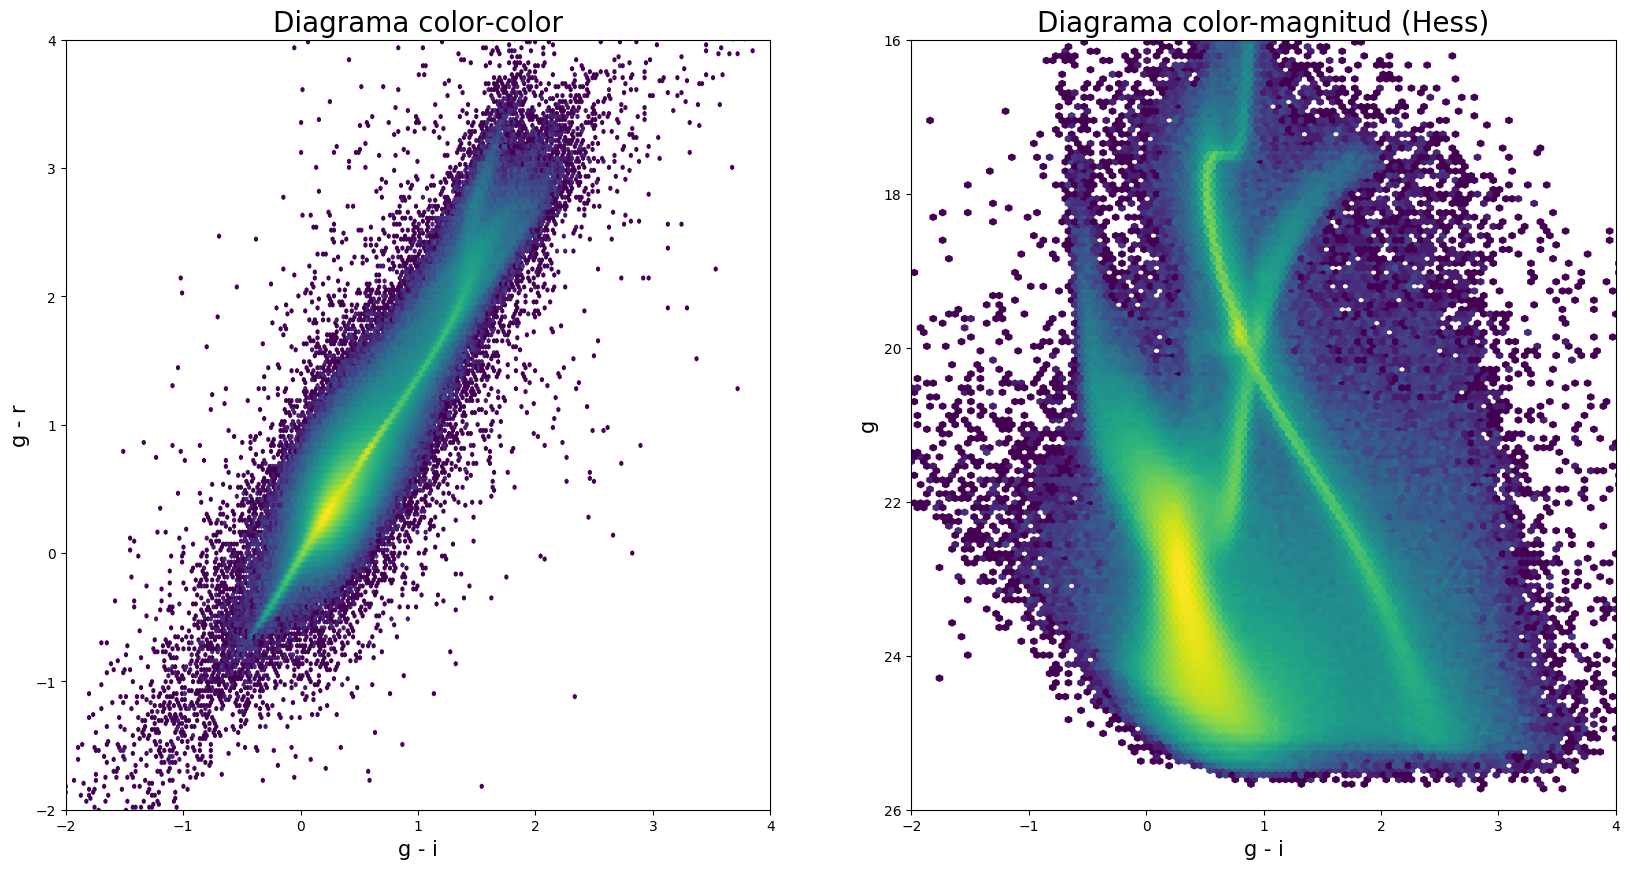

In [34]:
# Hacer una figura
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Diagrama color-color (diagrama de Hess)
im = ax1.hexbin(df_cmd['gmag']-df_cmd['rmag'],df_cmd['gmag']-df_cmd['imag'], \
                gridsize=400,cmap=matplotlib.cm.viridis,norm=matplotlib.colors.LogNorm())
ax1.set_ylabel('g - r',fontsize=15)
ax1.set_xlabel('g - i',fontsize=15)
ax1.set_title('Diagrama color-color',fontsize=20)
ax1.set_ylim(-2,4)
ax1.set_xlim(-2,4)


# Diagrama color-magnitud (diagrama de Hess)
im2 = ax2.hexbin(df_cmd['gmag']-df_cmd['imag'],df_cmd['gmag'], \
                 gridsize=200,cmap=matplotlib.cm.viridis,norm=matplotlib.colors.LogNorm())
ax2.set_xlabel('g - i',fontsize=15)
ax2.set_ylabel('g',fontsize=15)
ax2.set_title('Diagrama color-magnitud (Hess)',fontsize=20)
ax2.set_xlim(-2,4)
ax2.set_ylim(26,16);

### Usar la tabla cruzada de Gaia para aislar estrellas de 47 Tuc
La tabla smash_dr2.xmatch contiene cruces de SMASH con varios otros surveys, incluyendo Gaia DR2. En la consulta siguiente, usamos un LEFT JOIN para agregar información de movimiento propio de Gaia donde esté disponible.

In [35]:
query = """SELECT s.id,s.ra,s.dec,s.gmag,s.rmag,s.imag,g.gaia_pmra,g.gaia_pmdec
           FROM smash_dr2.object AS s
           LEFT JOIN (SELECT id,gaia_pmra,gaia_pmdec FROM smash_dr2.xmatch 
               WHERE q3c_radial_query(gaia_ra,gaia_dec,{0},{1},{2})) AS g
           ON s.id = g.id
           WHERE s.gerr<0.2 AND s.ierr<0.2 AND s.rerr<0.2
           AND q3c_radial_query(s.ra,s.dec,{0},{1},{2})
        """.format(f4['ra'].iloc[0],f4['dec'].iloc[0],1.0)
print(query)

SELECT s.id,s.ra,s.dec,s.gmag,s.rmag,s.imag,g.gaia_pmra,g.gaia_pmdec
           FROM smash_dr2.object AS s
           LEFT JOIN (SELECT id,gaia_pmra,gaia_pmdec FROM smash_dr2.xmatch 
               WHERE q3c_radial_query(gaia_ra,gaia_dec,6.23604,-72.3856,1.0)) AS g
           ON s.id = g.id
           WHERE s.gerr<0.2 AND s.ierr<0.2 AND s.rerr<0.2
           AND q3c_radial_query(s.ra,s.dec,6.23604,-72.3856,1.0)
        


In [36]:
try:
    df_cmd2 = qc.query(sql=query,fmt='pandas')
except Exception as e:
    print(e.message)

In [37]:
df_cmd2

,id,ra,dec,gmag,rmag,imag,gaia_pmra,gaia_pmdec
0,48049.302936,5.925116,-73.381282,21.883265,21.590117,21.502829,NaN,NaN
1,48049.298951,5.934808,-73.381186,24.068338,23.907747,24.155930,NaN,NaN
2,48049.282788,5.945385,-73.381760,23.178600,23.010650,22.954070,NaN,NaN
3,48049.293919,5.950396,-73.381579,22.887096,22.648434,22.652946,NaN,NaN
4,48049.302787,5.948900,-73.381081,23.981620,23.616570,23.461880,NaN,NaN
...,...,...,...,...,...,...,...,...
1922784,47854.310690,8.116262,-71.572245,22.958931,22.319963,21.994617,NaN,NaN
1922785,47854.193710,8.112057,-71.571529,25.112135,24.564966,24.201607,NaN,NaN
1922786,47854.300541,8.089613,-71.568166,23.162775,22.864628,22.762857,NaN,NaN
1922787,47854.276042,8.089704,-71.567329,21.866476,21.537762,21.443350,NaN,NaN


In [38]:
pm = np.sqrt(df_cmd2['gaia_pmra']**2 + df_cmd2['gaia_pmdec']**2)
df_cmdc = df_cmd2[pm>4] # Aislar objetos con movimiento propio mayor que 4 mas yr^-1

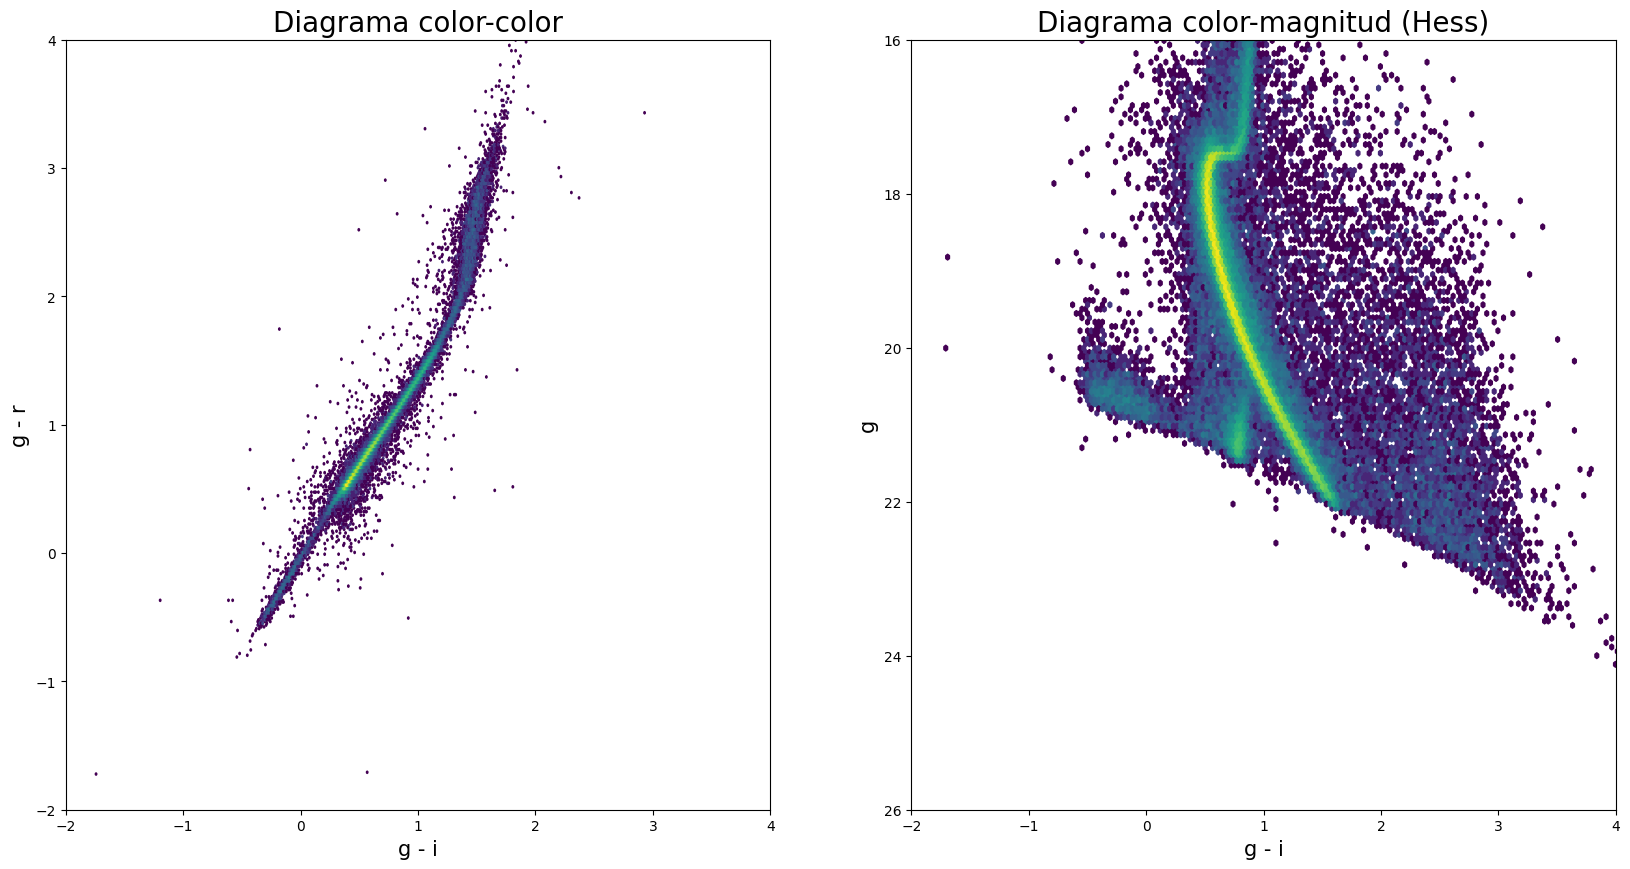

In [39]:
# Hacer una figura
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Diagrama color-color
im = ax1.hexbin(df_cmdc['gmag']-df_cmdc['rmag'],df_cmdc['gmag']-df_cmdc['imag'], \
                gridsize=400,cmap=matplotlib.cm.viridis,norm=matplotlib.colors.LogNorm())
ax1.set_ylabel('g - r',fontsize=15)
ax1.set_xlabel('g - i',fontsize=15)
ax1.set_title('Diagrama color-color',fontsize=20)
ax1.set_ylim(-2,4)
ax1.set_xlim(-2,4)


# Diagrama color-magnitud (diagrama de Hess)
im2 = ax2.hexbin(df_cmdc['gmag']-df_cmdc['imag'],df_cmdc['gmag'], \
                 gridsize=200,cmap=matplotlib.cm.viridis,norm=matplotlib.colors.LogNorm())
ax2.set_xlabel('g - i',fontsize=15)
ax2.set_ylabel('g',fontsize=15)
ax2.set_title('Diagrama color-magnitud (Hess)',fontsize=20)
ax2.set_xlim(-2,4)
ax2.set_ylim(26,16);

El diagrama color-color y el DCM de los objetos con alto movimiento propio aíslan la secuencia de 47 Tuc.

<a class="anchor" id="fileservice"></a>
# Servicio de Archivos SMASH DR2
Si no quieres trabajar con la base de datos, puedes usar el servicio de archivos SMASH DR2 para acceder a todos los archivos de la data release. En esta sección, damos algunos ejemplos de cómo hacerlo.

Acceder al servicio de archivos usando el Datalab storeClient. sc.ls() da un listado del contenido del servicio:

In [40]:
sc.ls('smash_dr2://')

'catalogs,instcal,photred,raw,resampled,stacked'

La salida es una cadena formateada como CSV, que podemos convertir a un dataframe de Pandas:

In [41]:
catlist = sc.ls('smash_dr2://catalogs')

In [42]:
catlist[0:100]

'46516_allobj.fits.gz,46516_allobj_bright.fits,46516_allobj_deep.fits.gz,46516_allobj_xmatch.fits.gz,'

In [43]:
dfcat = pd.DataFrame(catlist.split(','),columns=['file'])

In [44]:
dfcat

,file
0,46516_allobj.fits.gz
1,46516_allobj_bright.fits
2,46516_allobj_deep.fits.gz
3,46516_allobj_xmatch.fits.gz
4,46516_allsrc.fits.gz
...,...
4117,Field9_exposures.fits.gz
4118,LMC_mainbody_fields.txt
4119,README.txt
4120,SMC_mainbody_fields.txt


Podemos usar el dataframe para buscar archivos que contengan un ID de campo particular, por ejemplo:

In [45]:
obj = dfcat[dfcat['file'].str.contains('46659')]

In [46]:
obj

,file
16,46659_allobj.fits.gz
17,46659_allobj_bright.fits
18,46659_allobj_deep.fits.gz
19,46659_allobj_xmatch.fits.gz
20,46659_allsrc.fits.gz
21,46659_chips.fits.gz
22,46659_expmap.fits.gz
23,46659_exposures.fits.gz


La función storeClient.get() recupera datos en memoria. Podemos, por ejemplo, leer el contenido del archivo README del catálogo.

In [47]:
readme = sc.get('smash_dr2://catalogs/README.txt')

In [48]:
print(readme)

These are the SMASH calibrated catalogs for the 197 fields of DR2.
The overlapping fields in the LMC and SMC main bodies were also combined using 320 HEALPix regions.
LMC_mainbody_fields.txt lists the 68 overlapping LMC fields, and SMC_mainbody_fields.txt lists the
13 overlapping SMC fields.


There are eight FITS binary catalogs per field and HEALPix:
FIELD_exposures.fits.gz         information on each exposure
FIELD_chips.fits.gz             information on each chip
FIELD_allsrc.fits.gz            all of the individual source measurements for this field
FIELD_allobj.fits.gz            average values for each unique object
FIELD_allobj_deep.fits.gz       average values for each unique object using only the deepest exposures
FIELD_allobj_bright.fits        Bright stars from allobj used for cross-matching between fields
FIELD_allobj_xmatch.fits.gz     Crossmatches between SMASH and GAIA, 2MASS and ALLWISE.
FIELD_expmap.fits.gz            The "exposure" map per band.

More information on

<a class="anchor" id="resources"></a>
# Recursos y referencias

Nidever, D.L. et al. (2021, AJ, 161, 74), "The Second Data Release of SMASH – Survey of the Magellanic Stellar History" https://ui.adsabs.harvard.edu/abs/2021AJ....161...74N

Nidever, D.L. et al. (2017, AJ, 154, 199), "SMASH: Survey of the MAgellanic Stellar History"
https://ui.adsabs.harvard.edu/abs/2017AJ....154..199N/abstract

Martin, N.F. et al. (2015, ApJL, 804, 5), "Hydra II: A Faint and Compact Milky Way Dwarf Galaxy Found in the Survey of the Magellanic Stellar History"
https://ui.adsabs.harvard.edu/abs/2015ApJ...804L...5M/abstract